In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [34]:
from geopy.geocoders import OpenCage

In [35]:
geolocator = OpenCage(api_key="f7a9e963ed36475ea130feb0fe8ed54f")
loc = geolocator.geocode("atta market, Noida, Uttar Pradesh, India")
print(loc.address)
print(loc.latitude,loc.longitude)

Atta Market, Sector 18, Noida - 201301, Uttar Pradesh, India
28.5721607 77.3258053


In [36]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [37]:
df_train.shape

(45593, 20)

In [38]:
df_train.describe().transpose()
# here mean and 50%(median) are not much different , this suggests absence of outliers (or atleast to some extent)

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [40]:
df_train['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

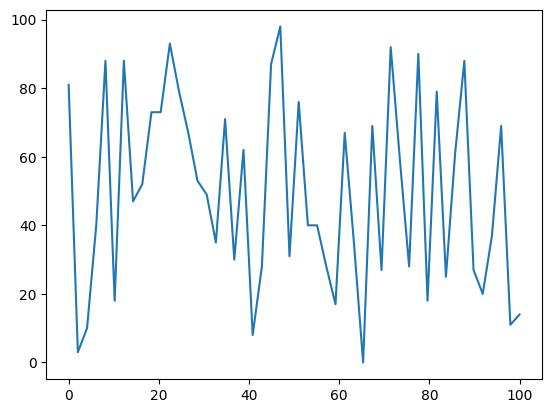

In [41]:
x = np.linspace(0,100,50)
y = np.random.randint(0,100,size=50)
plt.plot(x,y)


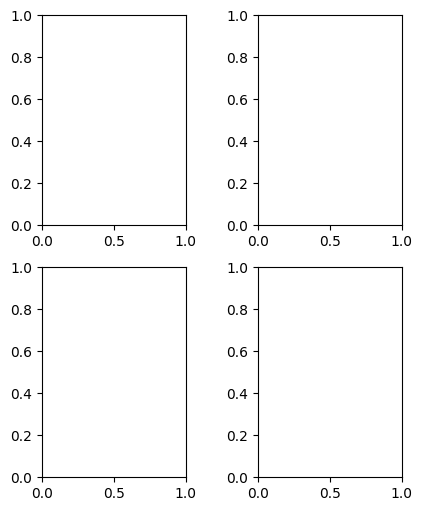

In [42]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)
fig.subplots_adjust(wspace=0.5,left=0.2,right=0.5)
# plt.tight_layout()
plt.show()

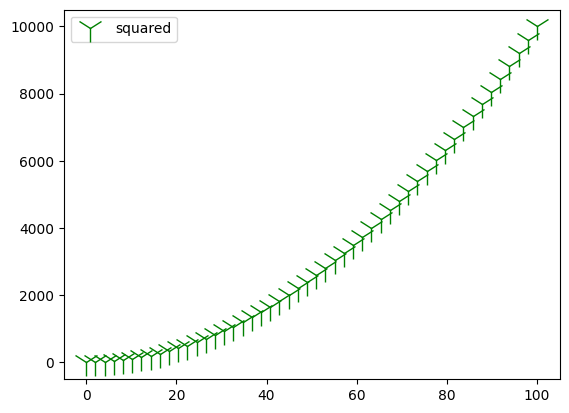

In [43]:
fig,ax = plt.subplots()
ax.plot(x,x**2,label="squared",marker='1',color='green',lw=0,ms='20')
ax.legend(loc=0)

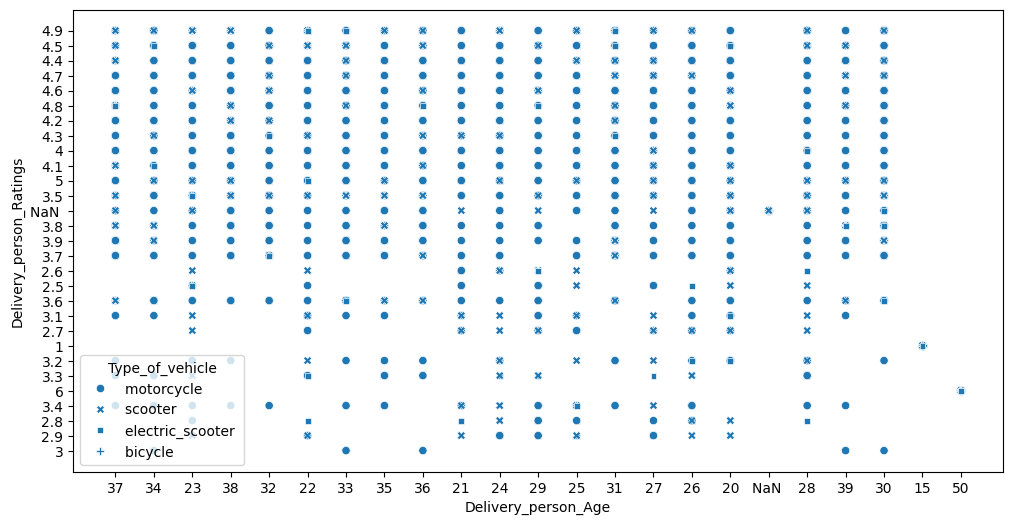

In [44]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=df_train,x='Delivery_person_Age',y='Delivery_person_Ratings',style='Type_of_vehicle')

<Axes: xlabel='City', ylabel='Delivery_person_Ratings'>

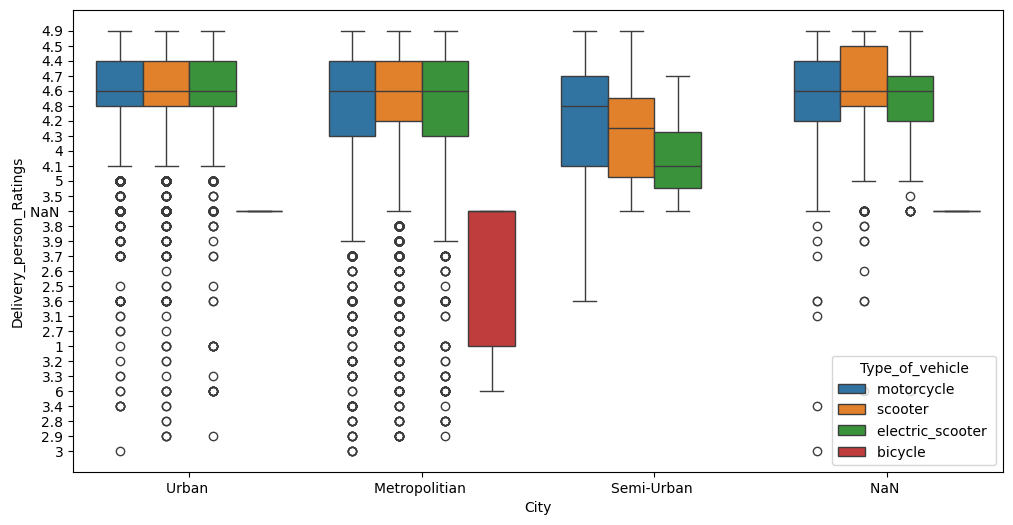

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train,x='City',y='Delivery_person_Ratings',hue='Type_of_vehicle')

In [46]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [47]:
#rename
df_train.rename(columns={'Weatherconditions':'Weather_conditions'},inplace=True)

In [48]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [49]:
df_train['Time_taken(min)'] = df_train['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
df_train['Weather_conditions'] = df_train['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
df_train['City_code']=df_train['Delivery_person_ID'].str.split('RES',expand=True).iloc[:,0]

In [50]:
df_train[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [51]:
df_train.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [52]:
#Check for Duplicate Values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [53]:
df_train['Delivery_person_Age'] = df_train['Delivery_person_Age'].astype('float64')
df_train['Delivery_person_Ratings'] = df_train['Delivery_person_Ratings'].astype('float64')
df_train['multiple_deliveries'] = df_train['multiple_deliveries'].astype('float64')
df_train['Order_Date']=pd.to_datetime(df_train['Order_Date'],format="%d-%m-%Y")

In [54]:
# Now NaN which is present as a string will now actually be recognized as a missing value
df_train.replace('NaN', float(np.nan), regex=True,inplace=True)

In [55]:
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Restaurant_latitude               0
Order_Date                        0
Restaurant_longitude              0
Time_Order_picked                 0
Delivery_location_latitude        0
Delivery_location_longitude       0
Vehicle_condition                 0
Type_of_vehicle                   0
Type_of_order                     0
Time_taken(min)                   0
City_code                         0
dtype: int64

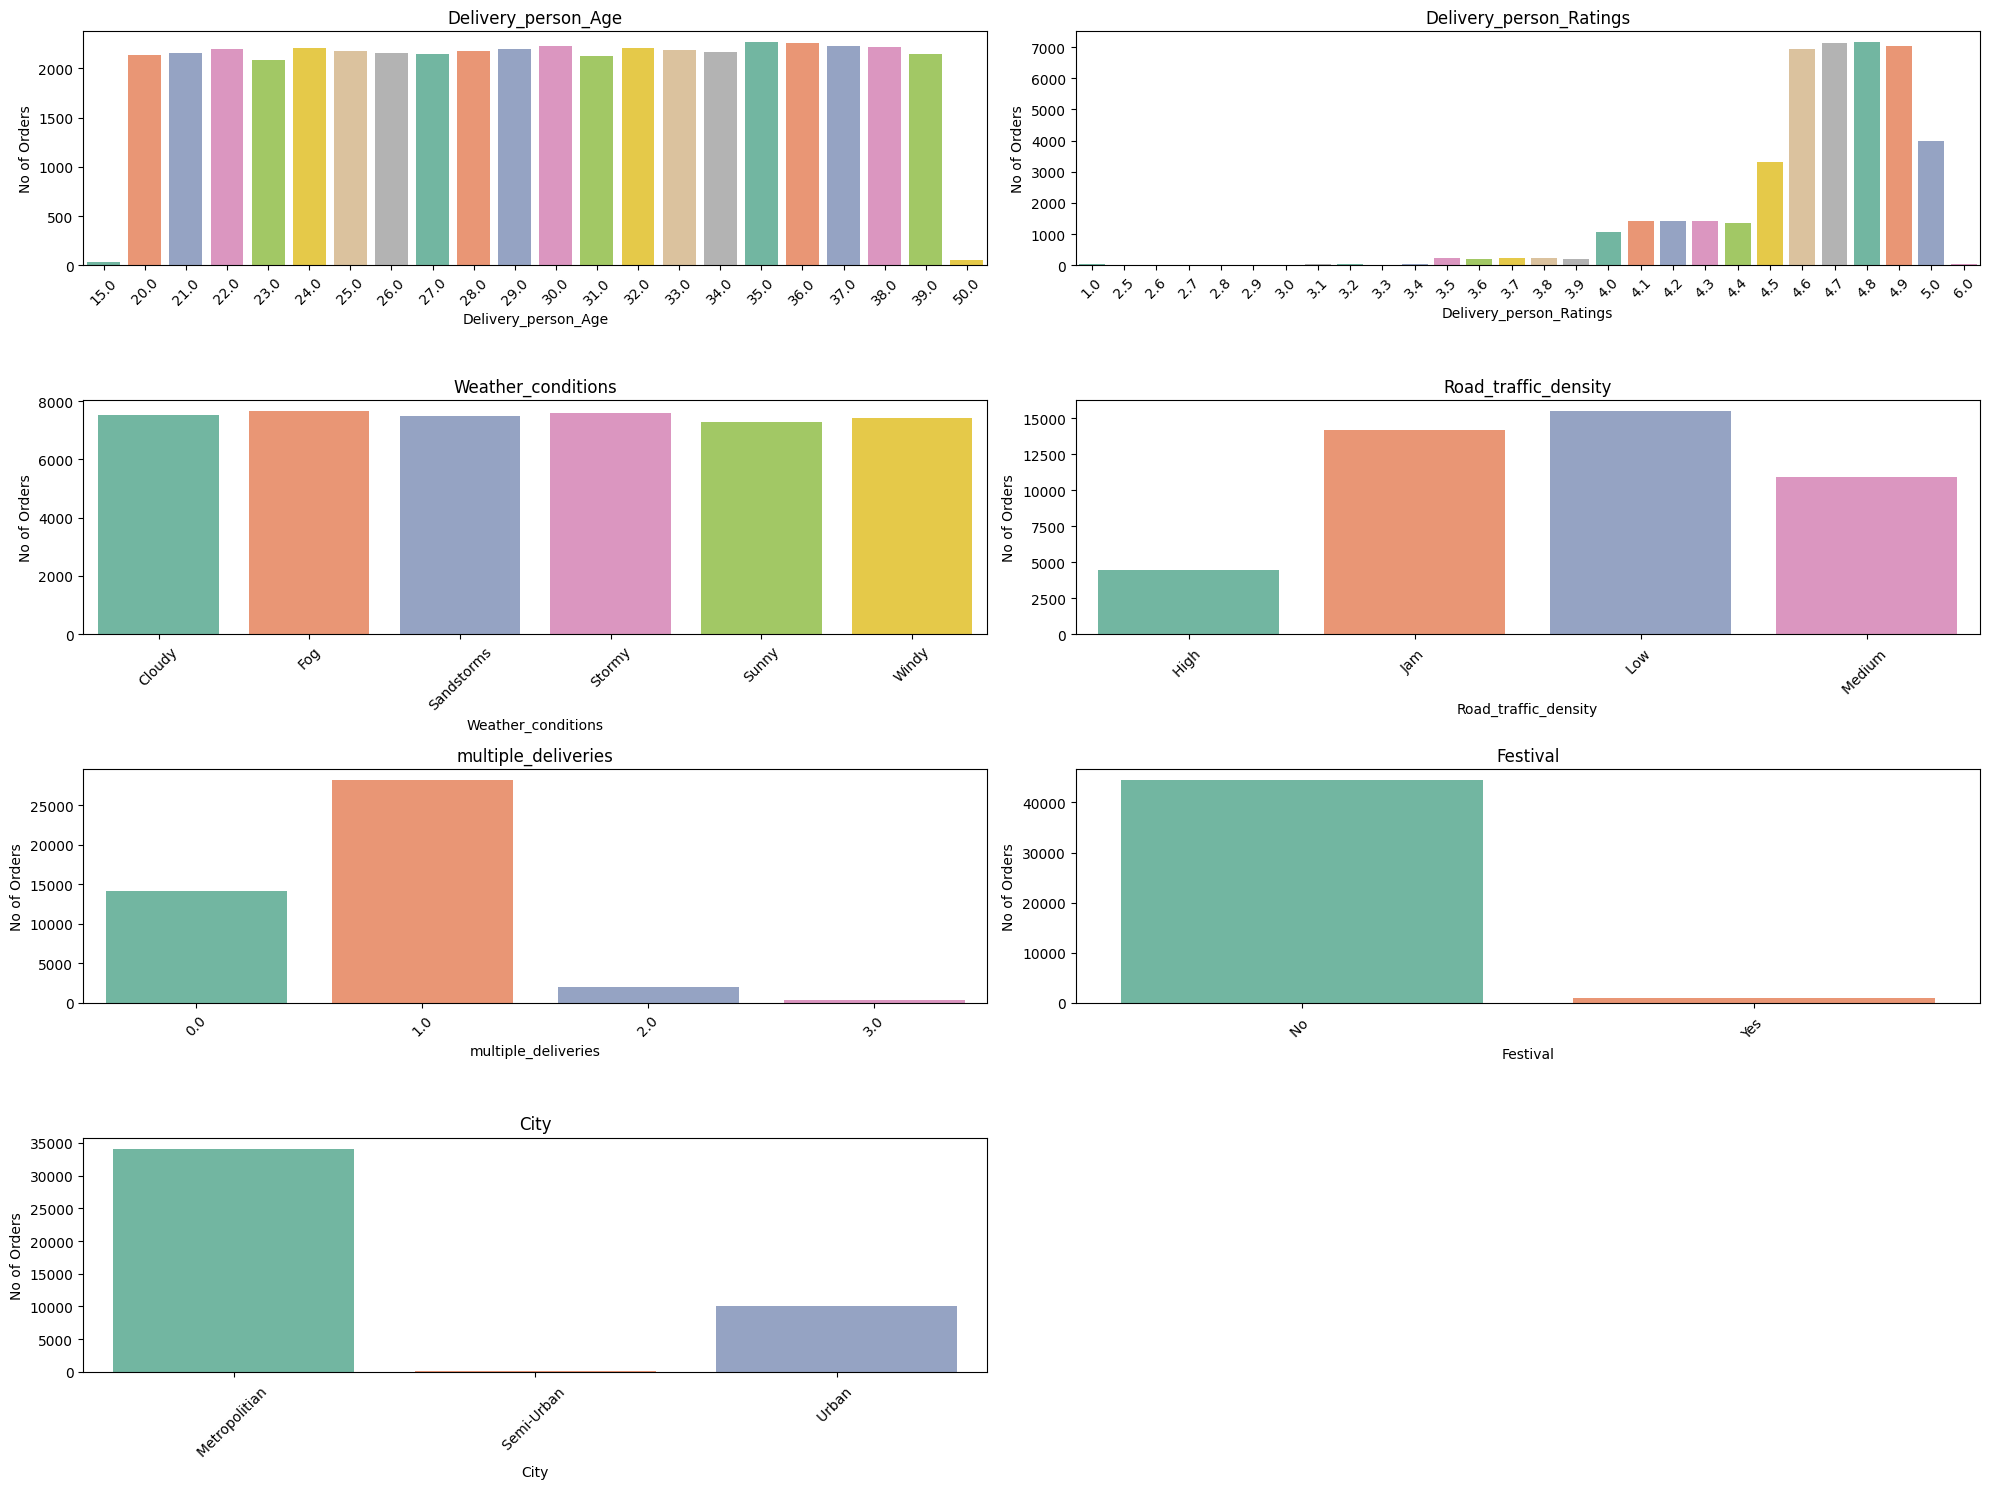

In [56]:
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i,column in enumerate(cols):
    row = i//2
    col = i%2
    ax = axes[row,col]
    sns.countplot(data=df_train,x=column,order=df_train[column].value_counts().sort_index().index,ax=ax,palette='Set2')
    ax.set_xlabel(column)
    ax.set_ylabel('No of Orders')
    ax.set_title(column)
    ax.tick_params(axis='x',rotation=45)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.tight_layout()

In [57]:
df_train['Delivery_person_Age'].fillna(np.random.choice(df_train['Delivery_person_Age']), inplace=True)
df_train['Weather_conditions'].fillna(np.random.choice(df_train['Weather_conditions']), inplace=True)
df_train['City'].fillna(df_train['City'].mode()[0], inplace=True)
df_train['Festival'].fillna(df_train['Festival'].mode()[0], inplace=True)
df_train['multiple_deliveries'].fillna(df_train['multiple_deliveries'].mode()[0], inplace=True)
df_train['Road_traffic_density'].fillna(df_train['Road_traffic_density'].mode()[0], inplace=True)
df_train['Delivery_person_Ratings'].fillna(df_train['Delivery_person_Ratings'].median(), inplace=True)

In [58]:
df_train[df_train['Time_Orderd'].isnull()].head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
42,27.0,4.7,19.121999,72.908493,19.201999,72.988493,2022-04-06,NaN,18:35:00,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33,MUM
74,27.0,4.7,12.935662,77.614130,12.975662,77.654130,2022-03-11,NaN,15:30:00,Stormy,Low,1,Drinks,scooter,0.0,No,Metropolitian,19,BANG
120,27.0,4.7,22.312790,73.170283,22.422790,73.280283,2022-04-02,NaN,18:25:00,Stormy,Low,3,Snack,electric_scooter,0.0,No,Metropolitian,25,VAD
140,27.0,4.7,18.543626,73.905101,18.573626,73.935101,2022-03-09,NaN,23:40:00,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19,PUNE
179,27.0,4.7,26.913483,75.803139,26.983483,75.873139,2022-03-12,NaN,17:50:00,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43,JAP


In [59]:
df_train["day"] = df_train.Order_Date.dt.day
df_train["month"] = df_train.Order_Date.dt.month
df_train["quarter"] = df_train.Order_Date.dt.quarter
df_train["year"] = df_train.Order_Date.dt.year
df_train['day_of_week'] = df_train.Order_Date.dt.day_of_week.astype(int)
df_train["is_month_start"] = df_train.Order_Date.dt.is_month_start.astype(int)
df_train["is_month_end"] = df_train.Order_Date.dt.is_month_end.astype(int)
df_train["is_quarter_start"] = df_train.Order_Date.dt.is_quarter_start.astype(int)
df_train["is_quarter_end"] = df_train.Order_Date.dt.is_quarter_end.astype(int)
df_train["is_year_start"] = df_train.Order_Date.dt.is_year_start.astype(int)
df_train["is_year_end"] = df_train.Order_Date.dt.is_year_end.astype(int)
df_train['is_weekend'] = np.where(df_train['day_of_week'].isin([5,6]),1,0)

In [60]:
df_train['Time_Orderd'] = pd.to_timedelta(df_train['Time_Orderd'])
df_train['Time_Order_picked'] = pd.to_timedelta(df_train['Time_Order_picked'])

In [61]:
df_train['Time_Order_picked_formatted'] = df_train['Order_Date'] + np.where(df_train['Time_Order_picked'] < df_train['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df_train['Time_Order_picked']
df_train['Time_Ordered_formatted'] = df_train['Order_Date'] + df_train['Time_Orderd']
df_train['Time_Order_picked_formatted']=pd.to_datetime(df_train['Time_Order_picked_formatted'])
df_train['order_prepare_time'] = (df_train['Time_Order_picked_formatted'] - df_train['Time_Ordered_formatted']).dt.total_seconds() / 60

In [62]:
df_train.to_csv('hello.csv')

In [64]:
df_train['order_prepare_time'].isnull().sum()

np.int64(1731)

In [68]:
df_train['order_prepare_time'].value_counts()

order_prepare_time
5.0     14703
15.0    14610
10.0    14549
Name: count, dtype: int64

<Axes: xlabel='order_prepare_time', ylabel='count'>

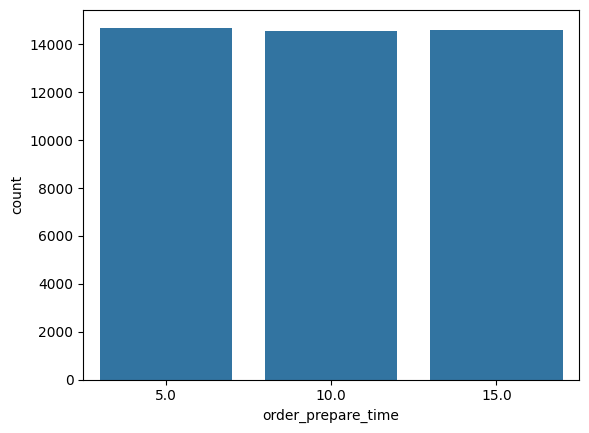

In [65]:
sns.countplot(data=df_train,x='order_prepare_time')

In [69]:
# well why did they use median , i guess we can also use other options
# see how the time ordered missing values are not made up for once we have calculated order_prepare_time
df_train['order_prepare_time'].fillna(df_train['order_prepare_time'].median(), inplace=True)
df_train.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)

In [70]:
df_train.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
City_code                      0
day                            0
month                          0
quarter                        0
year                           0
day_of_week                    0
is_month_start                 0
is_month_end                   0
is_quarter_start               0
is_quarter_end                 0
is_year_start                  0
is_year_end                    0
is_weekend                     0
order_prepare_time             0
dtype: int64

In [85]:
restaurant_coordinates=df_train[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_coordinates=df_train[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
df_train['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
df_train['distance']= df_train['distance'].astype("str").str.extract('(\d+)').astype("int64")
# geodesic returns a distance object which when converted to string gives like '3.04567 km' , therefore extracting the main digits and converting
# back to int

In [86]:
df_train.to_csv('hello.csv')

# Label Encoding 

In [92]:
categorical_columns = df_train.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
df_train[categorical_columns] = df_train[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

In [93]:
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,5,0,0,0,0,0,0,1,15.0,6


In [94]:
df_train.to_csv('hello.csv')

# Train Test Split

In [95]:
#Split features & label
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 29)
(36474,)
(9119, 29)
(9119,)


# Standardization

In [96]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Model Building

In [99]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},  
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()


LinearRegression:
Best parameters: {}
Best R2 score: 0.4219042497823614

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7169002313675377

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.812286756255333

XGBRegressor:
Best parameters: {'max_depth': 9, 'n_estimators': 20}
Best R2 score: 0.8209827303886413



In [100]:
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [101]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.17
Mean Squared Error (MSE): 15.79
Root Mean Squared Error (RMSE): 3.97
R-squared (R2) Score: 0.82


In [102]:
import pickle

# Define the filename
filename = 'model.pkl'

# Save the model using pickle
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")


Model saved to model.pkl


In [103]:
# Define the filename
filename_scaler = 'scaler.pkl'

# Save the model using pickle
with open(filename_scaler, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Model saved to {filename_scaler}")

Model saved to scaler.pkl
